第一题

In [1]:
# 导入必要的库
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data  # 特征
y = iris.target  # 标签

# 划分数据集，训练集比例 0.2，随机种子 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练 SVM 模型（使用线性核函数）
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# 预测测试集
y_pred = svm_model.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 计算宏平均召回率
f1 = f1_score(y_test, y_pred, average='macro')  # 计算宏平均 F1 分数
conf_matrix = confusion_matrix(y_test, y_pred)

# 输出评估结果
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"F1 Score (Macro): {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0000
Recall (Macro): 1.0000
F1 Score (Macro): 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


第二题

类别标签：['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
数据集描述：.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a 
数据样本：["From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrg

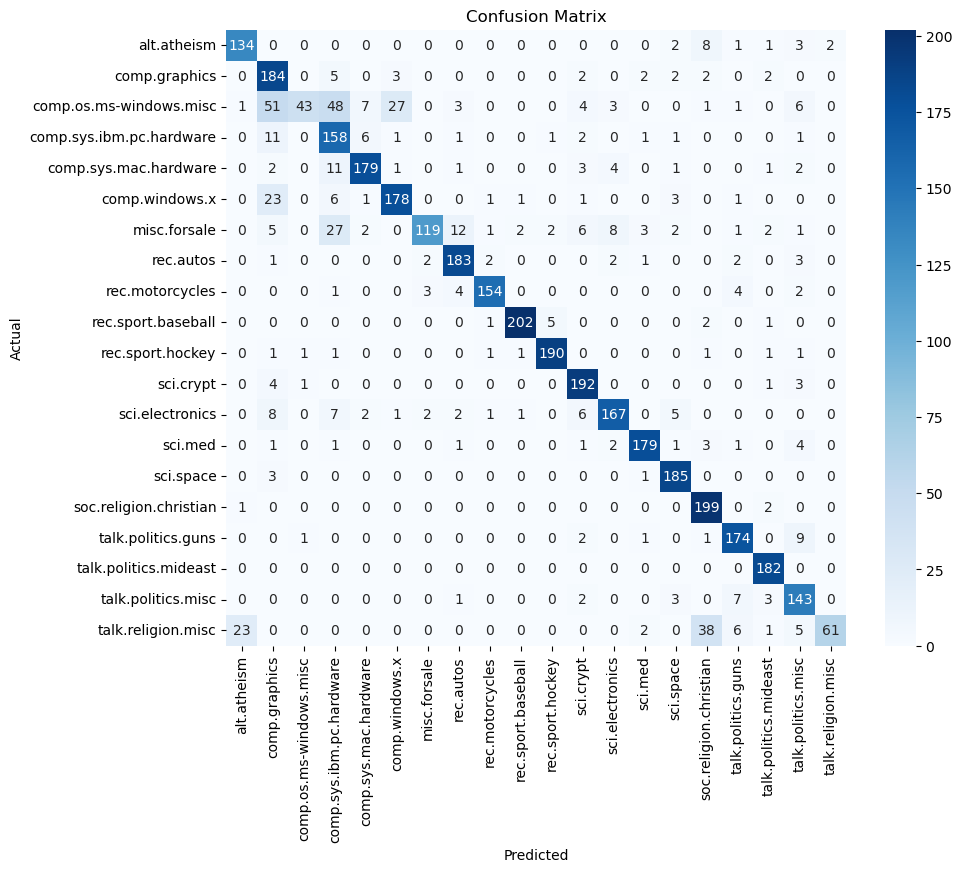

In [2]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# 加载新闻数据集
newsgroups = fetch_20newsgroups(subset='all')

# 查看类别标签、数据集描述和前几个数据样本
print(f"类别标签：{newsgroups.target_names}")
print(f"数据集描述：{newsgroups.DESCR[:500]}")  # 只显示前500个字符
print(f"数据样本：{newsgroups.data[:2]}")

# 文本数据转换为词袋模型
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(newsgroups.data)  # 转换为稀疏矩阵
y = newsgroups.target  # 标签

# 将数据集分为训练集和测试集，训练集比例 0.2，随机种子 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练朴素贝叶斯分类器
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# 预测测试集
y_pred = nb_model.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 计算宏平均召回率
f1 = f1_score(y_test, y_pred, average='macro')  # 计算宏平均 F1 分数

# 输出评估结果
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"F1 Score (Macro): {f1:.4f}")

# 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


第三题